# Лабораторная работа 1

датасет https://www.kaggle.com/datasets/mikhail1681/walmart-sales

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats

### описание датасета

8 колонок
1. Store - ID магазина.
2. Date - Дата начала недели статистики
3. Weekly_Sales - Сумма недельрного оборота
4. Holiday_Flag - Флаг проведения праздничных акций
5. Temperature - Средняя температура воздуха на неделе
6. Fuel_Price - Средняя цена топлива на неделе
7. CPI - Consumer price index
8. Unemployment - Безработица

In [ ]:
data = pd.read_csv(r'C:\Users\ksarb\Documents\MMO_2024\Datasets\Walmart_sales.csv', sep=",")

In [ ]:
# Первые 5 строк датасета
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.shape

(6435, 8)

In [ ]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Store - 0
Date - 0
Weekly_Sales - 0
Holiday_Flag - 0
Temperature - 0
Fuel_Price - 0
CPI - 0
Unemployment - 0


In [ ]:
# Основные статистические характеристки набора данных
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Визуальный анализ

### Гистограмма
Позволяет оценить плотность вероятности распределения данных. Поскольку у нас все параметры числовые, есть смысл построить по всем параметрам.

C:\Users\ksarb\AppData\Local\Temp\ipykernel_9024\1182377358.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numeric[col])
C:\Users\ksarb\AppData\Local\Temp\ipykernel_9024\1182377358.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numeric[col])
C:\Users\ksarb\AppData\Local\Temp\

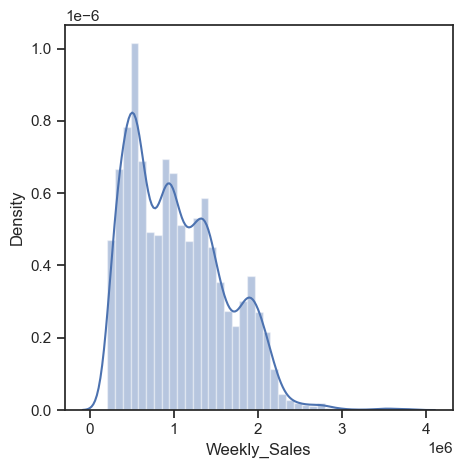

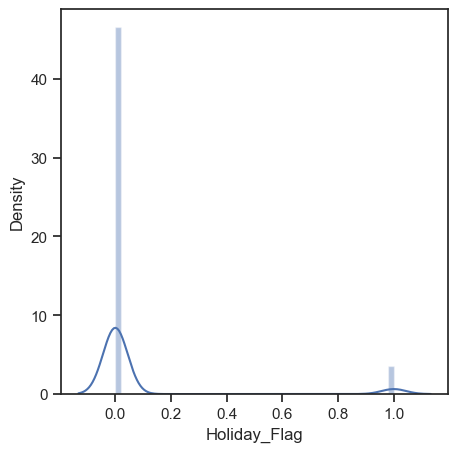

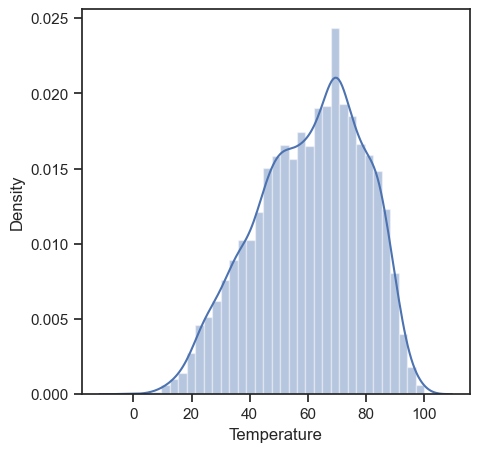

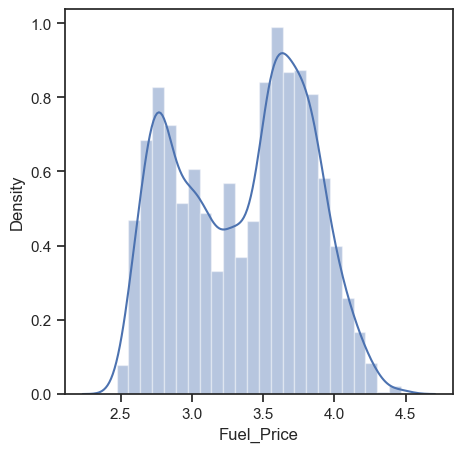

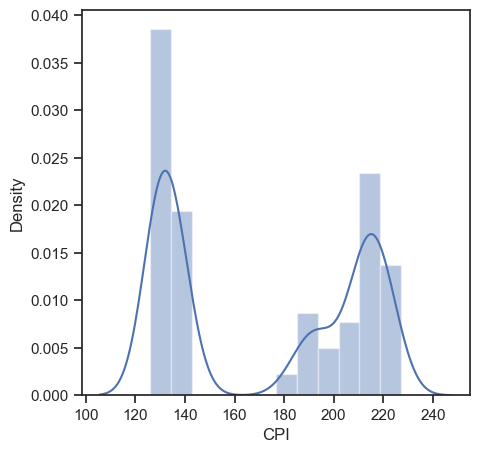

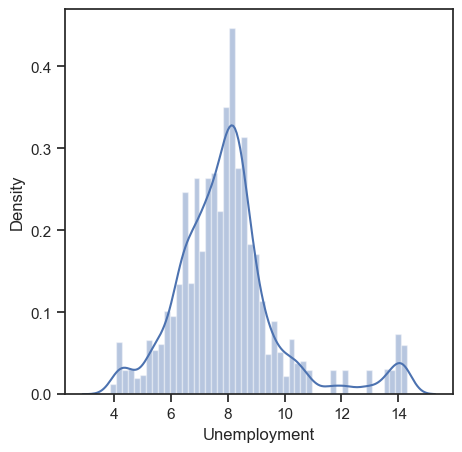

In [ ]:
data_numeric = data.drop(columns=['Store', 'Date'])
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.distplot(data_numeric[col])

Видно, что нормального распределения велеичины не имеют, при этом гистограмма категорияльного признака holiday_flag малозначима.

### диаграммы рассяния
pairplot - комбинация гистограмм и диаграмм рассеяния

I:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


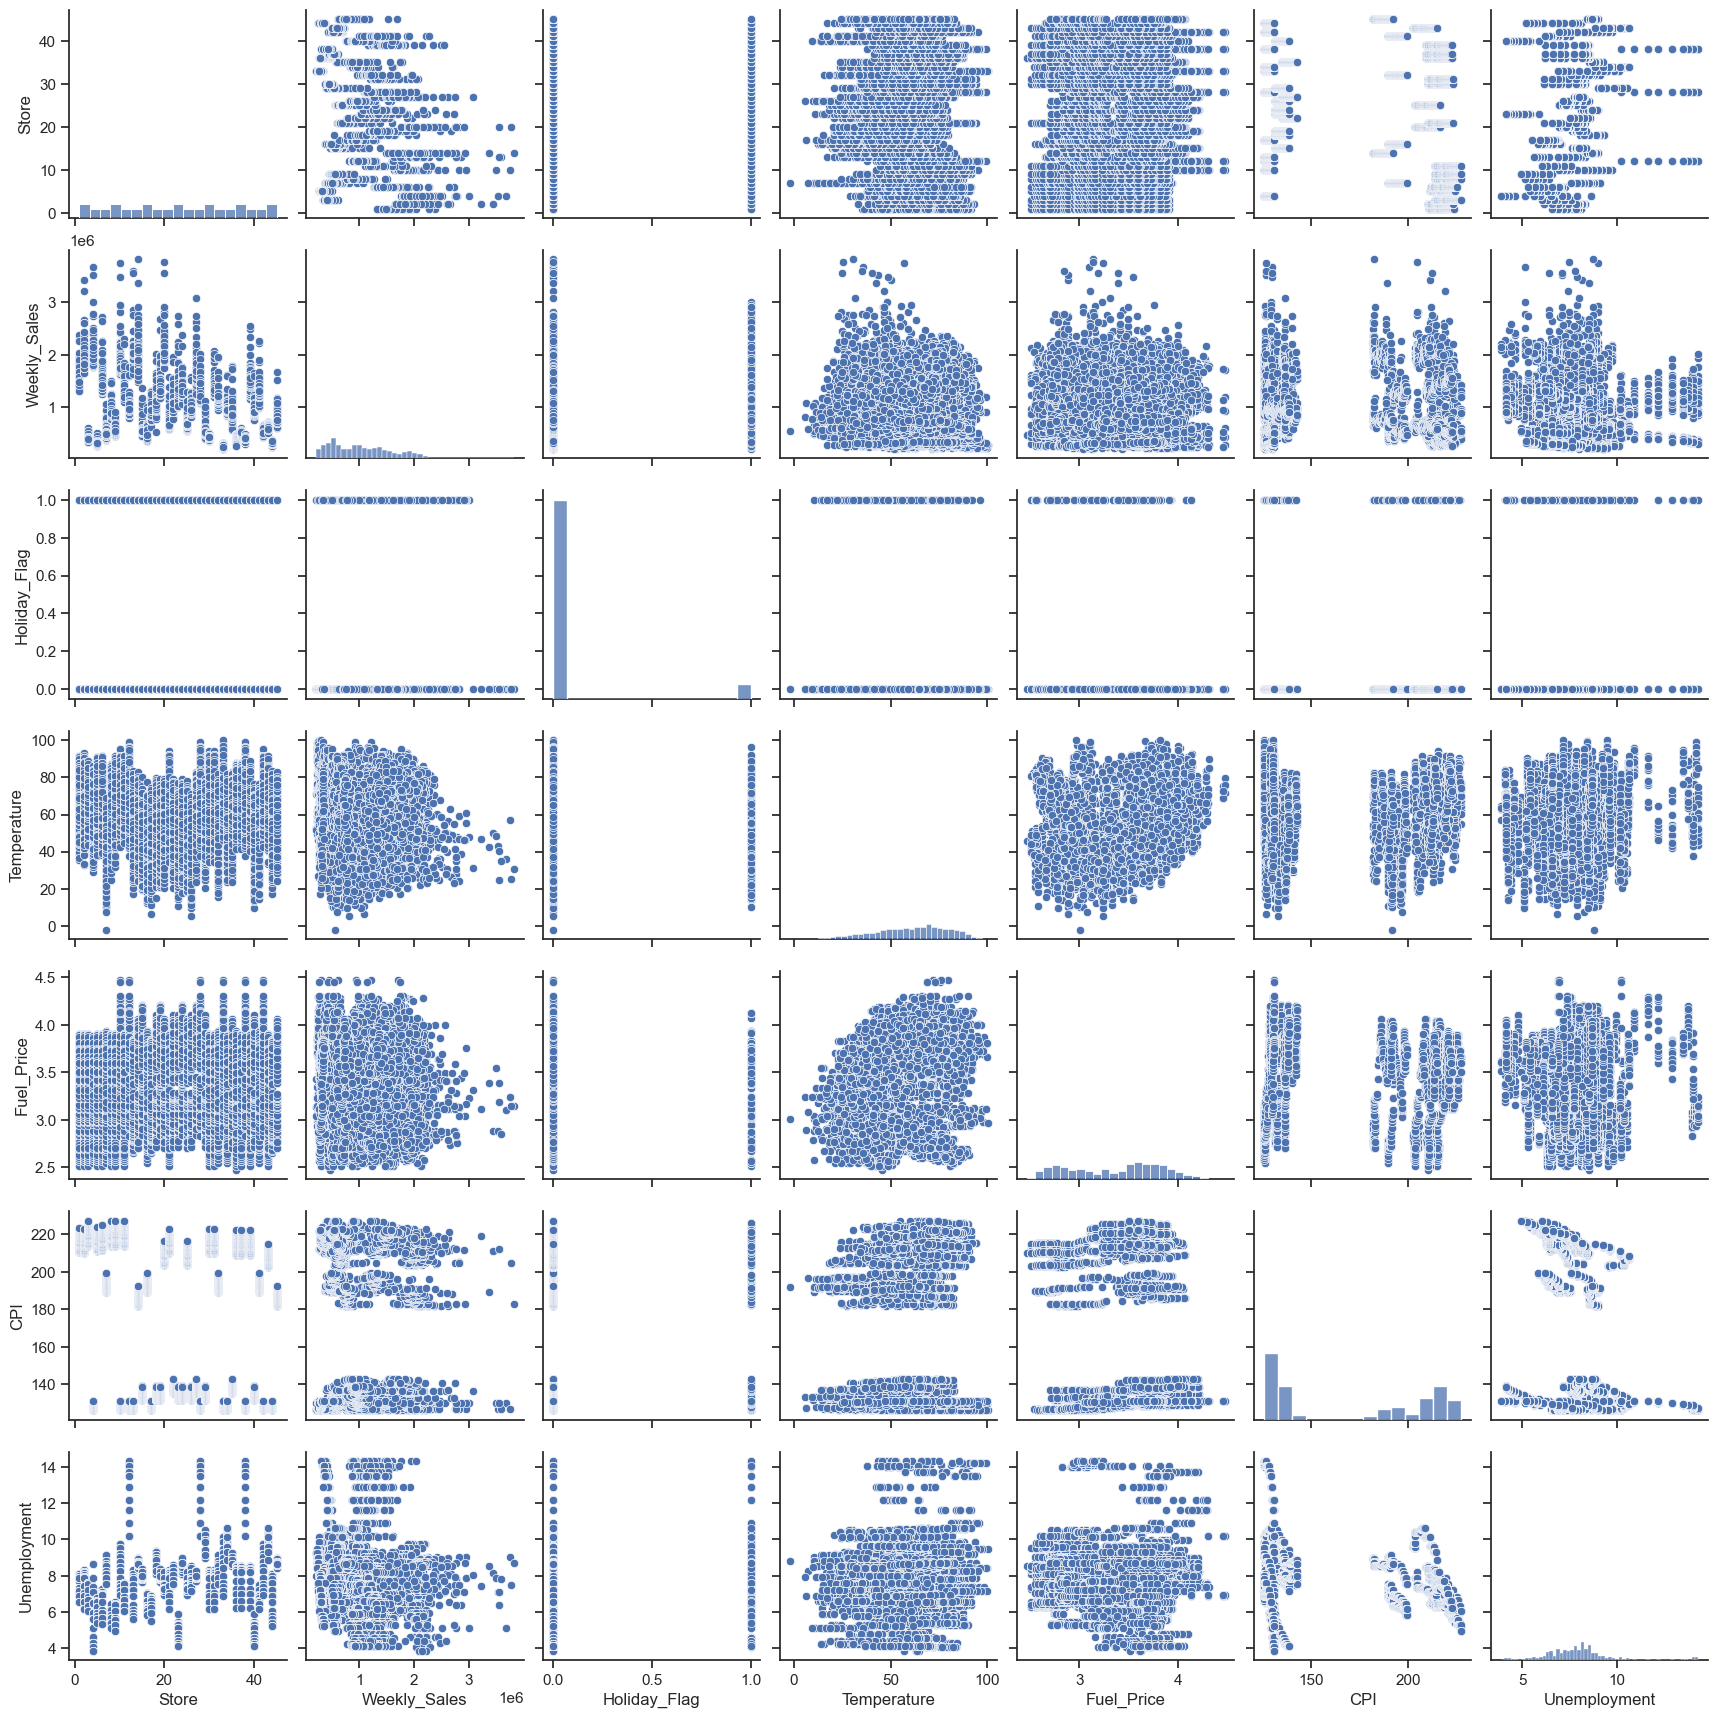

In [ ]:
sns.pairplot(data)

I:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


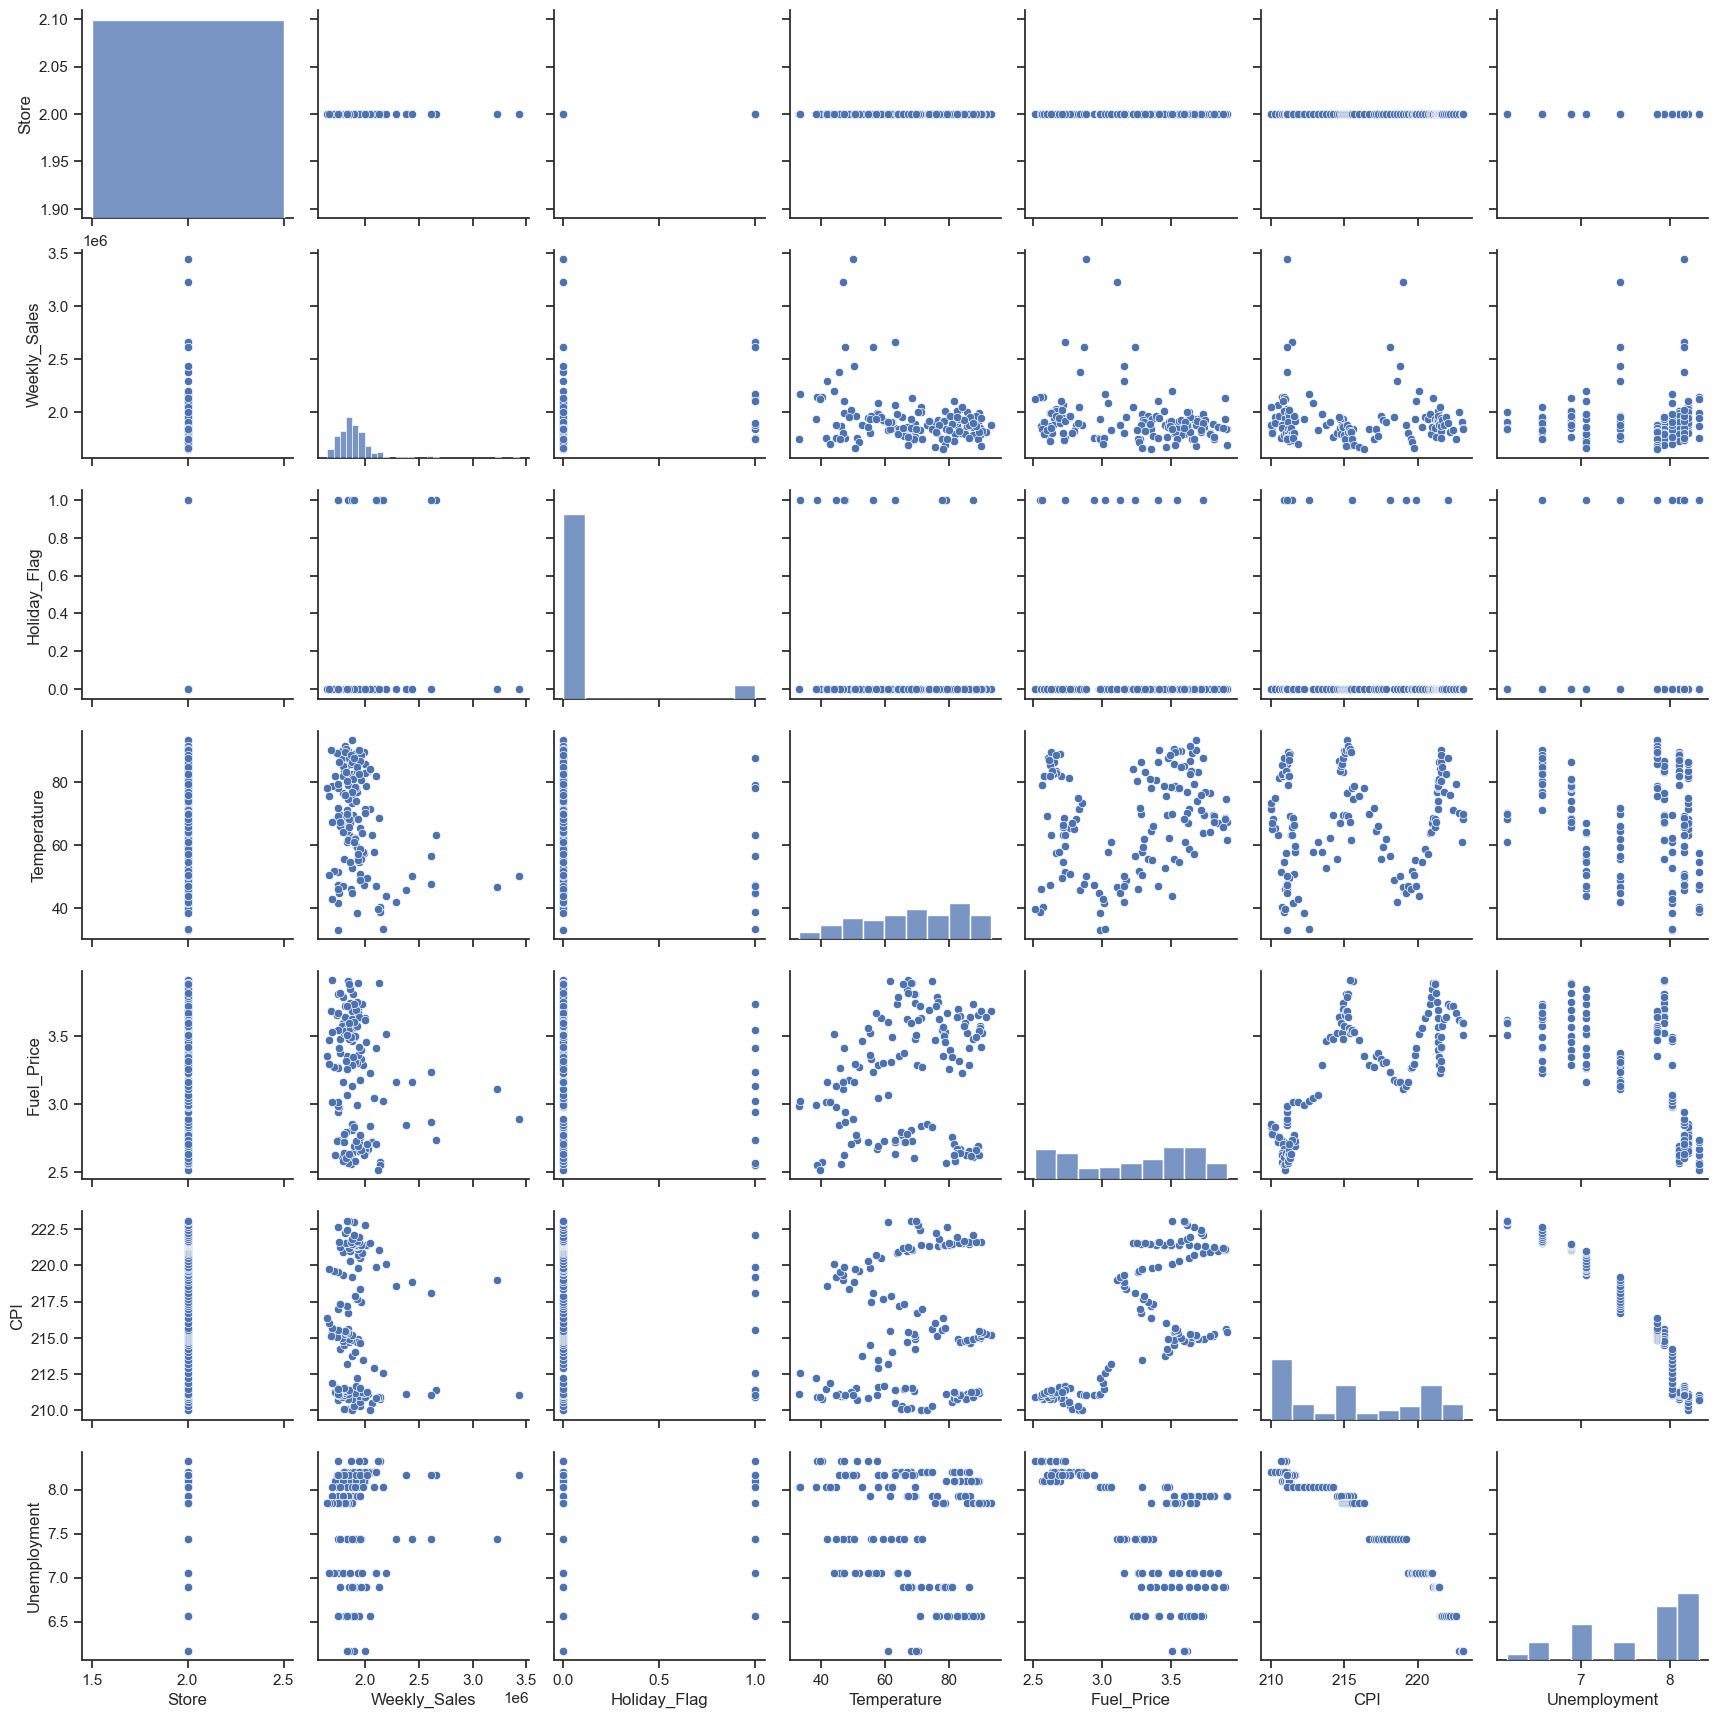

In [ ]:
sns.pairplot(data.loc[data['Store']==2])

На диаграммах рассеяния можно заметить корреляции между значемиями, но только при фильтрации по 1 магазину. Дальнейший анализ производим в 2 вариантах: полный и для 1 магазина.

In [ ]:
data_1_store = data.loc[data['Store']==2]

Теперь выполним шаги data-to-vis для multiple numerical:
boxplot ->
violin plot ->
ridgeline ->
heatmap

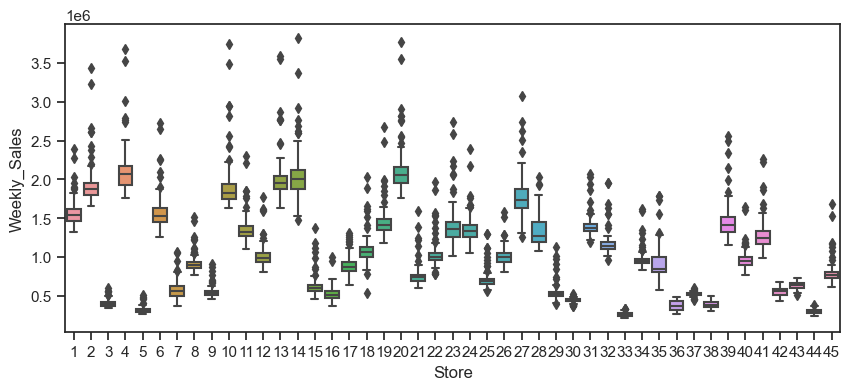

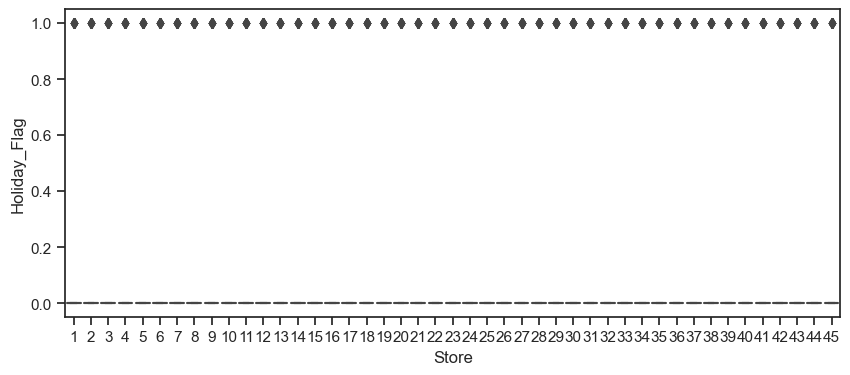

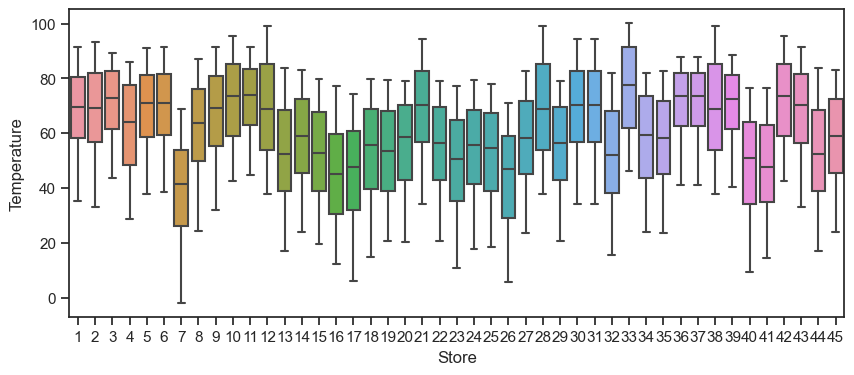

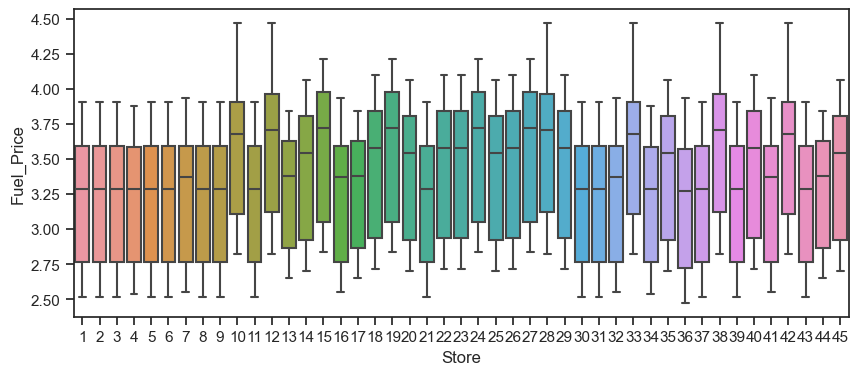

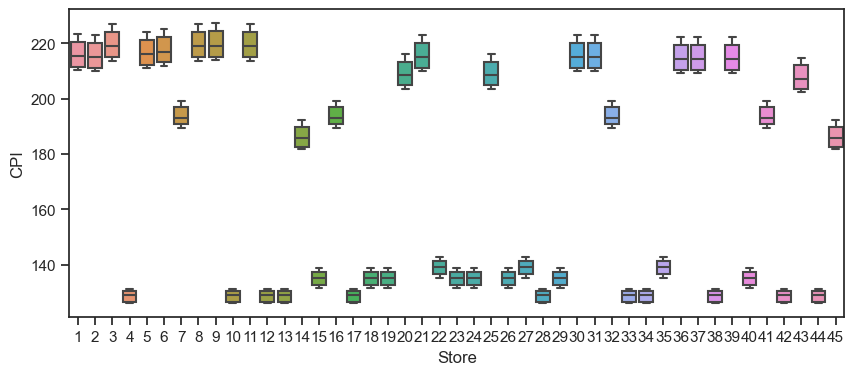

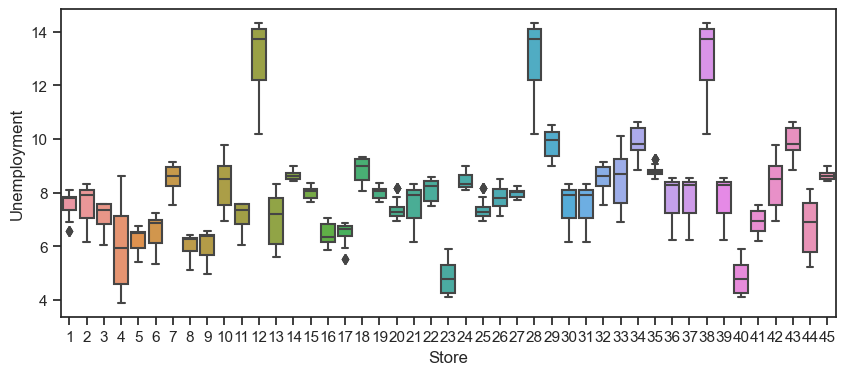

In [ ]:
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(10,4))
    sns.boxplot(x='Store', y=col, data=data)

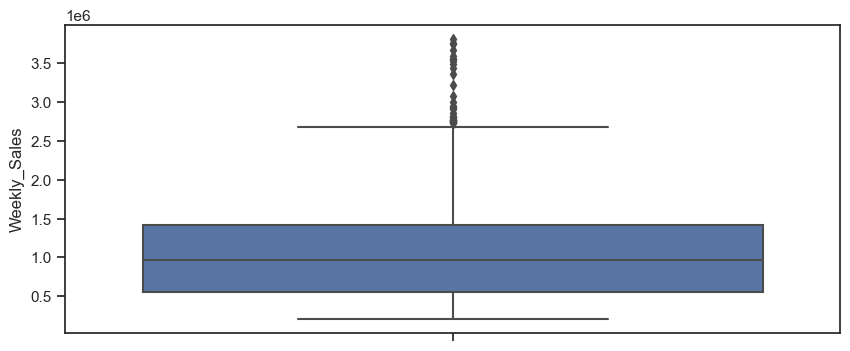

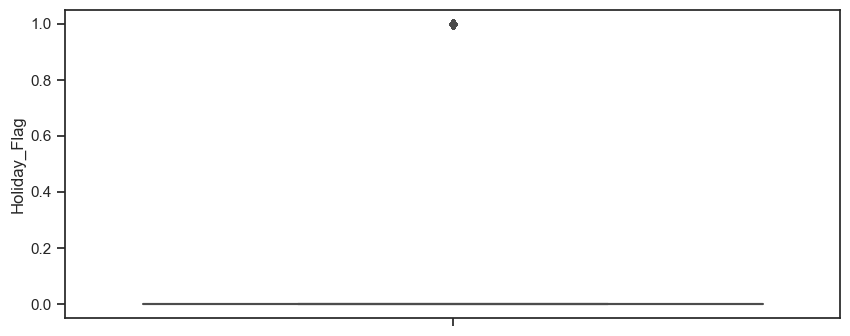

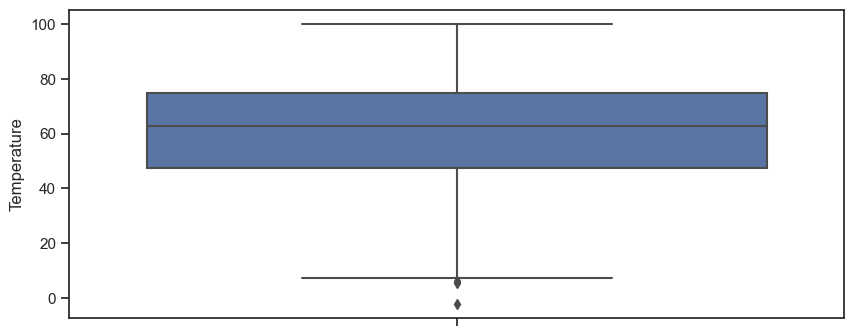

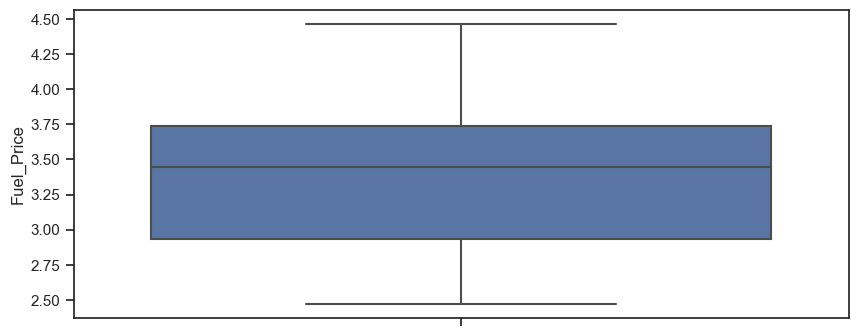

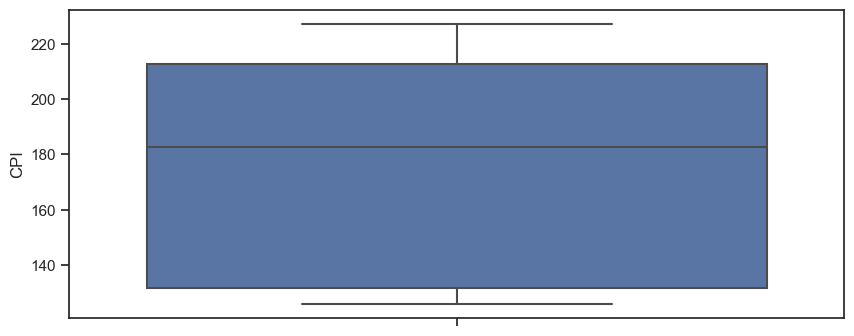

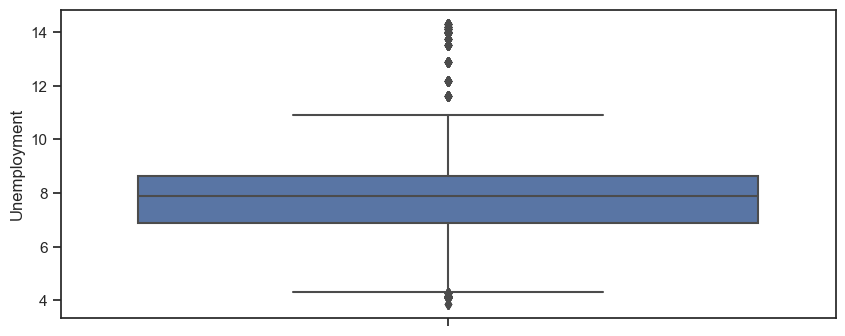

In [ ]:
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(10,4))
    sns.boxplot(y=col, data=data)

boxplot показывает распределение и квартили для значений.

на примере CPI особенно хорошо видно различие между анализом в 1 магазине, и в нескольких - boxplot по магазинам явно деемонстрирует дыру около 160 CPI.

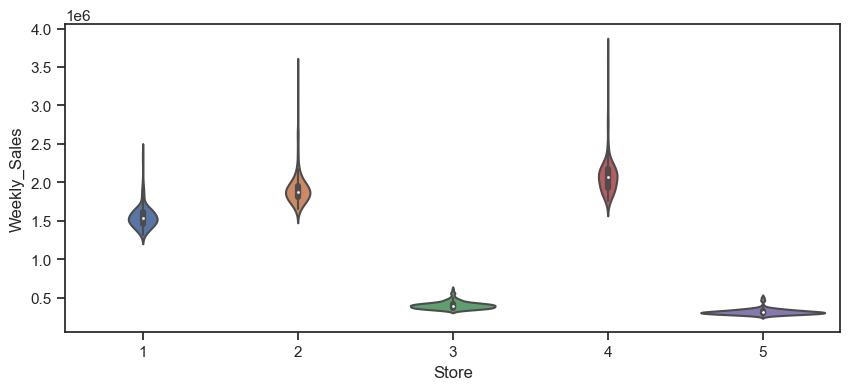

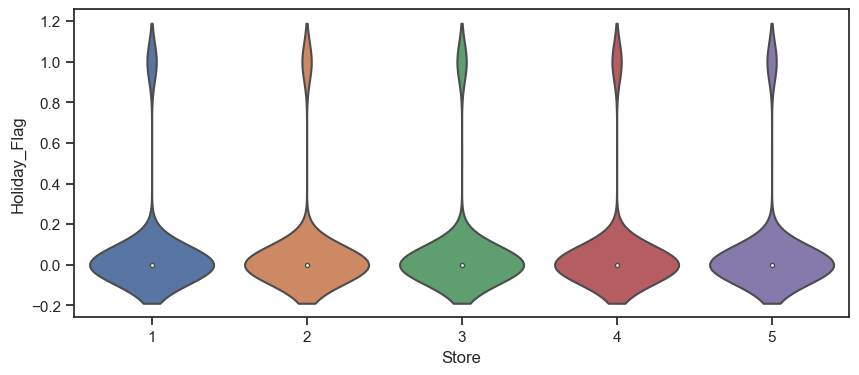

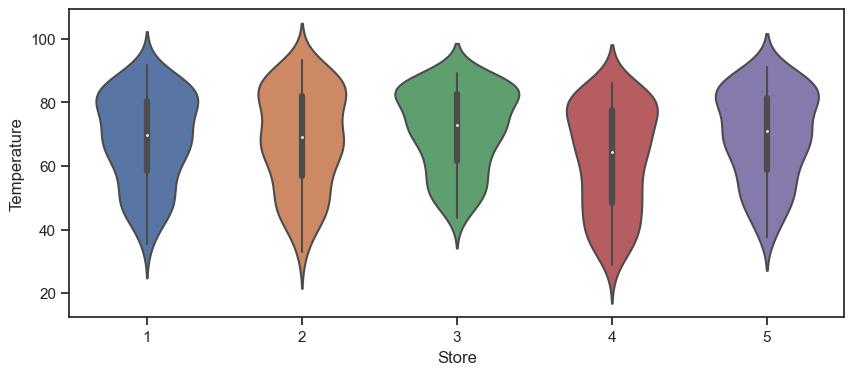

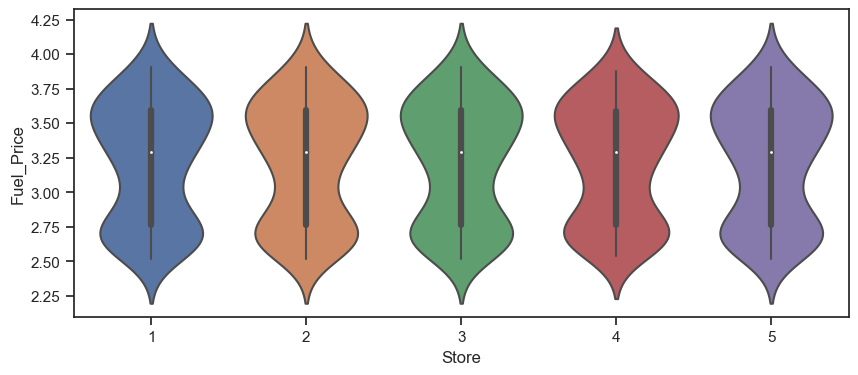

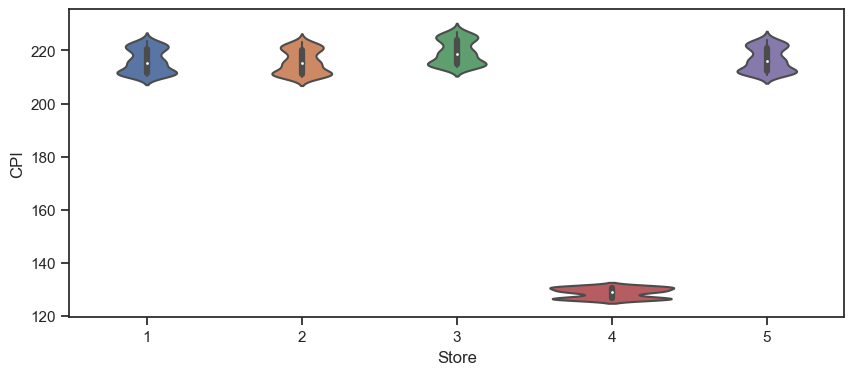

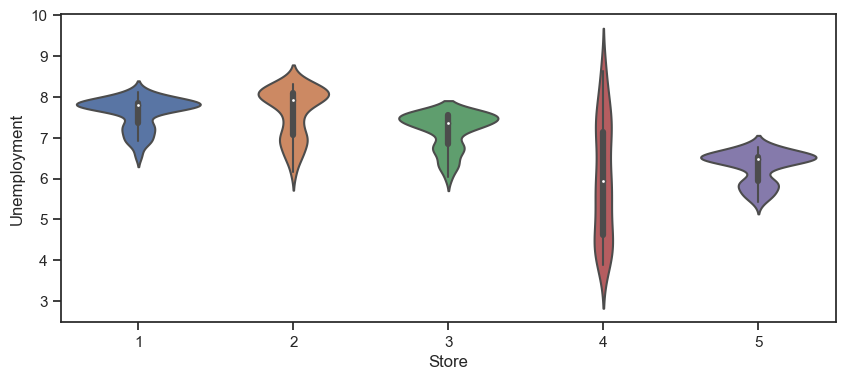

In [ ]:
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(10,4))
    sns.violinplot(x='Store', y=col, data=data.loc[data['Store'].isin([1,2,3,4,5])])

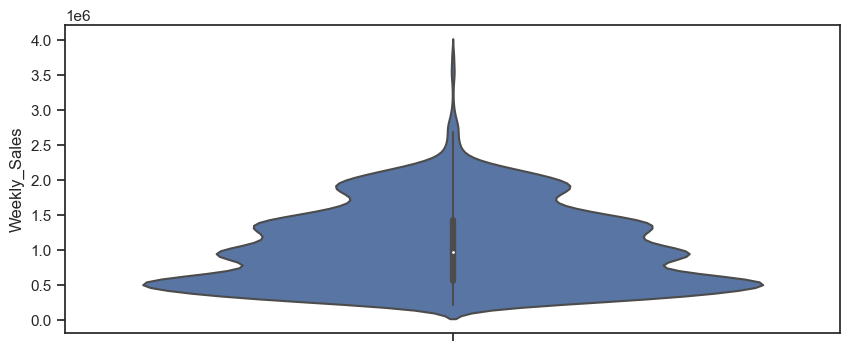

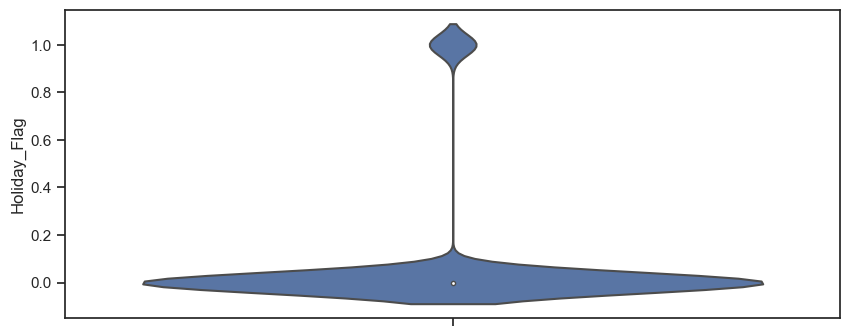

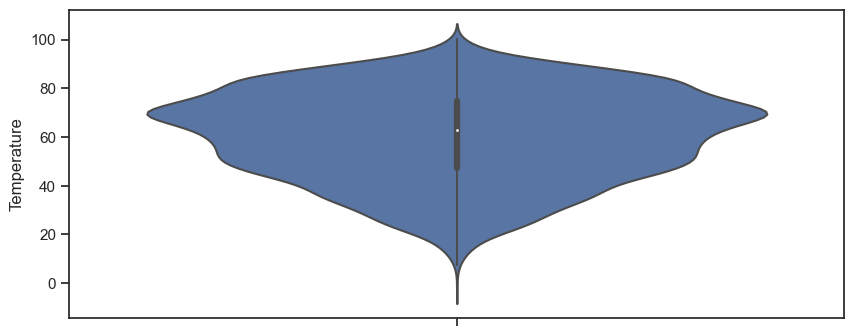

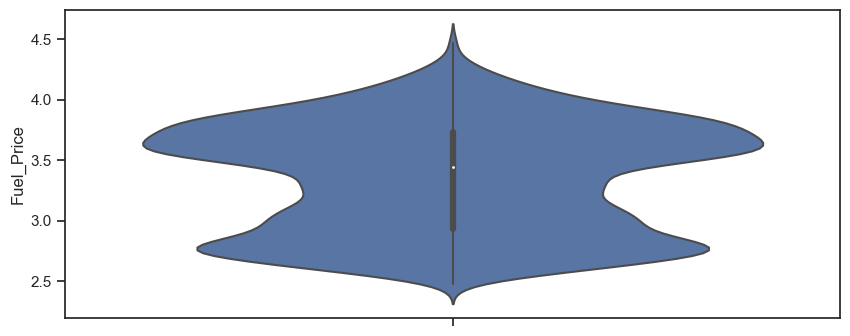

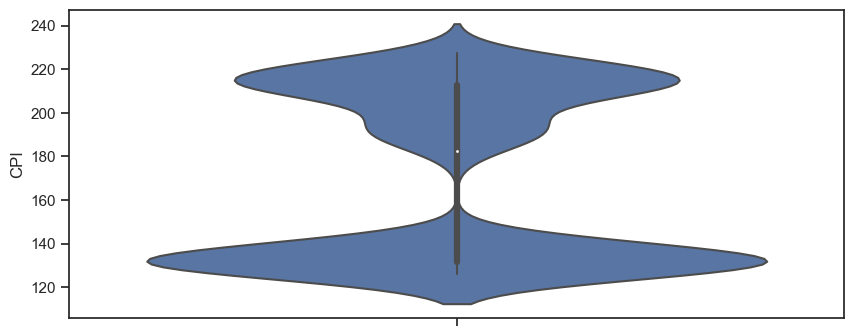

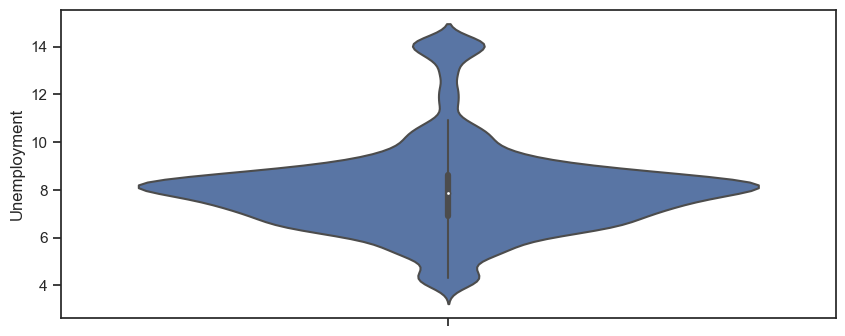

In [ ]:
for col in data_numeric:
    fig, ax = plt.subplots(figsize=(10,4))
    sns.violinplot( y=col, data=data)

violinplot хуже для визуализации нескольких рядов - поскольку ширина графика сильно значима. Видно, что рапределеня топлива имеют схожие формы. Форма unemployment сильно отличается от остальных для магазина 4.

I:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
I:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
I:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


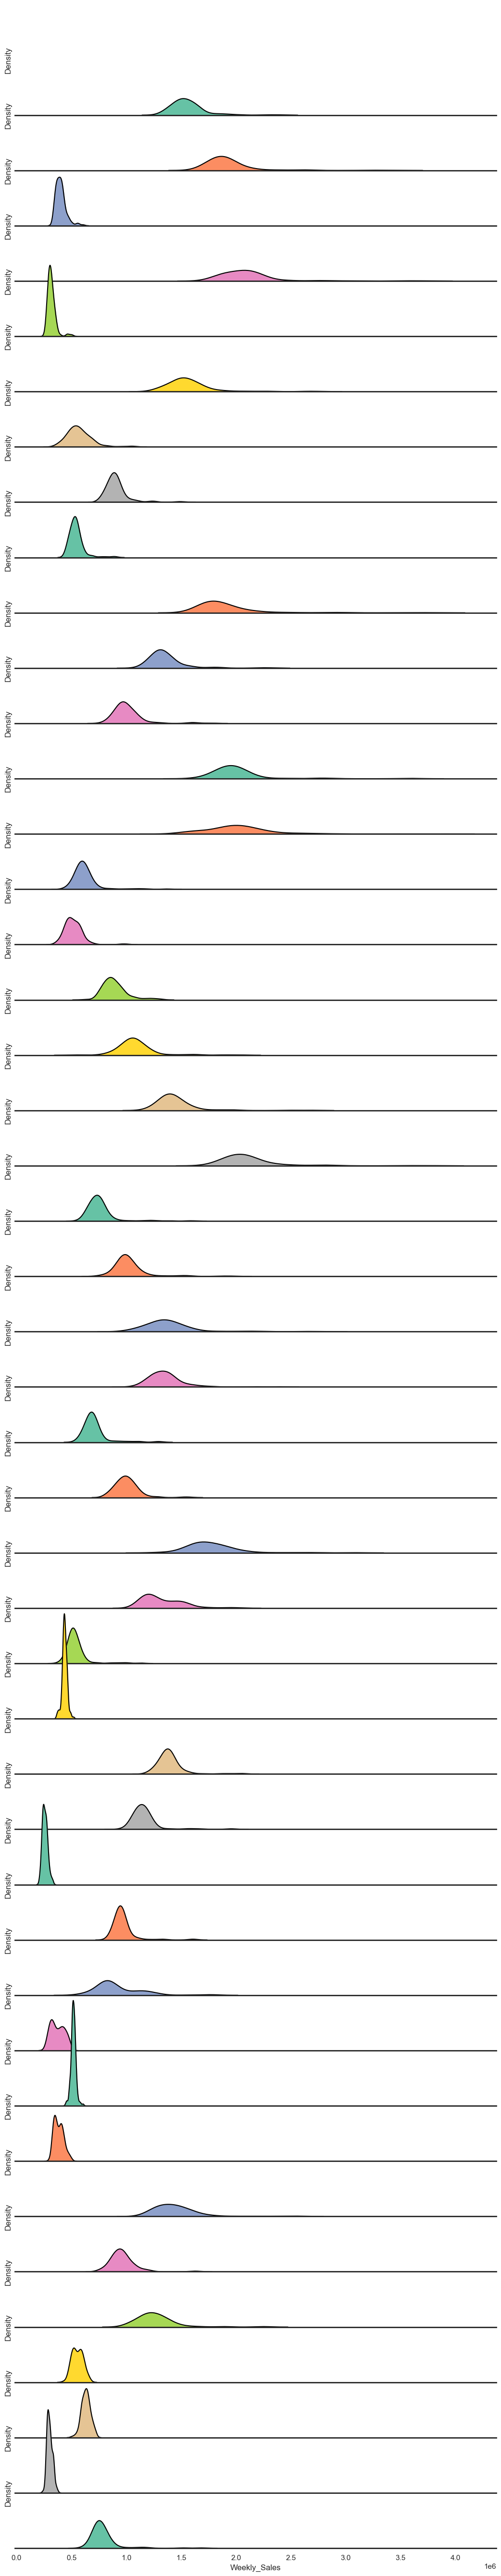

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth' :2})
palette = sns.color_palette("Set2", 12)
g = sns. FacetGrid( data, palette=palette, row="Store", hue="Store", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Weekly_Sales", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Weekly_Sales", color='black')
def label(x, color, label):
    ах = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
    ha="left", va="center", transform=ax. transAxes)
g.map(label, "Weekly_Sales")
g.fig.subplots_adjust ( hspace=-.5)
g.set_titles ("")
g.set(yticks= [], xlabel="Weekly_Sales")
g.despine(left=True)

Видно, что для всех магазинов есть 1 вероятное значение. Возможно, большая часть магазинов имеет околонормальное распределение. То, что все пики находятся в левой части графика говорит о том, что выбросы в данных - это сверхприбыльные дни.

<Axes: >

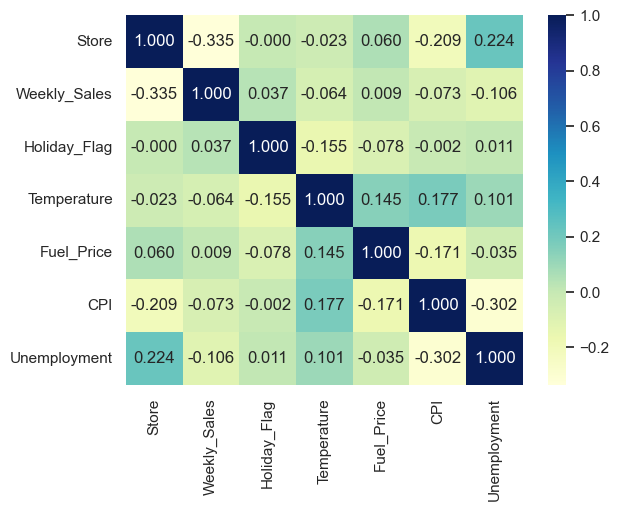

In [ ]:
sns.heatmap(data.drop(columns=['Date']).corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<Axes: >

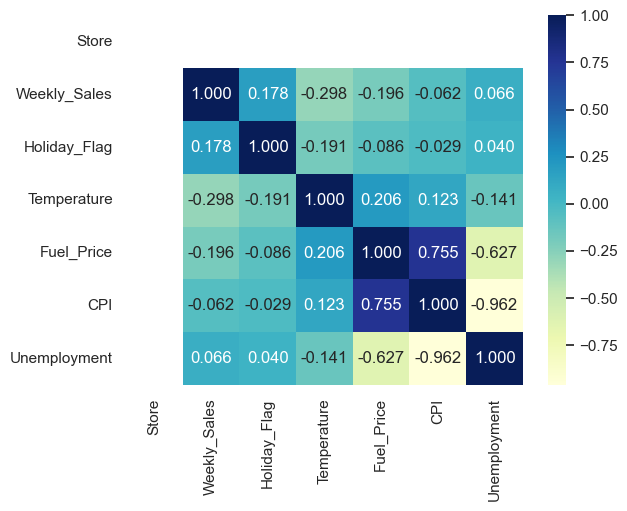

In [ ]:
sns.heatmap(data_1_store.drop(columns=['Date']).corr(), cmap='YlGnBu', annot=True, fmt='.3f')

Итоги:

* Fuel price сильно коррелирует с CPI
* Unemployment - сильная обратная корреляция с CPI

-> На Weekly sales в рамках 1 магазина нет значимого влияния от указанных пунктов, кроме слабой корелляции с holiday flag.